<a href="https://colab.research.google.com/github/Formula-Electric-Berkeley/FEBSim/blob/main/discharge_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = 4.15e+00*x^0 + -6.01e-04*x^1 + 1.57e-06*x^2 + -2.26e-09*x^3 + 1.56e-12*x^4 + -5.62e-16*x^5 + 1.02e-19*x^6 + -7.40e-24*x^7
y = 4.08e+00*x^0 + -7.05e-04*x^1 + 1.87e-06*x^2 + -2.71e-09*x^3 + 1.92e-12*x^4 + -7.12e-16*x^5 + 1.33e-19*x^6 + -9.91e-24*x^7
y = 3.97e+00*x^0 + -6.21e-04*x^1 + 1.52e-06*x^2 + -2.09e-09*x^3 + 1.42e-12*x^4 + -5.12e-16*x^5 + 9.42e-20*x^6 + -6.96e-24*x^7
y = 3.81e+00*x^0 + -6.93e-04*x^1 + 1.77e-06*x^2 + -2.32e-09*x^3 + 1.50e-12*x^4 + -5.21e-16*x^5 + 9.27e-20*x^6 + -6.67e-24*x^7
y = 3.66e+00*x^0 + -5.88e-04*x^1 + 1.53e-06*x^2 + -2.00e-09*x^3 + 1.28e-12*x^4 + -4.37e-16*x^5 + 7.69e-20*x^6 + -5.50e-24*x^7


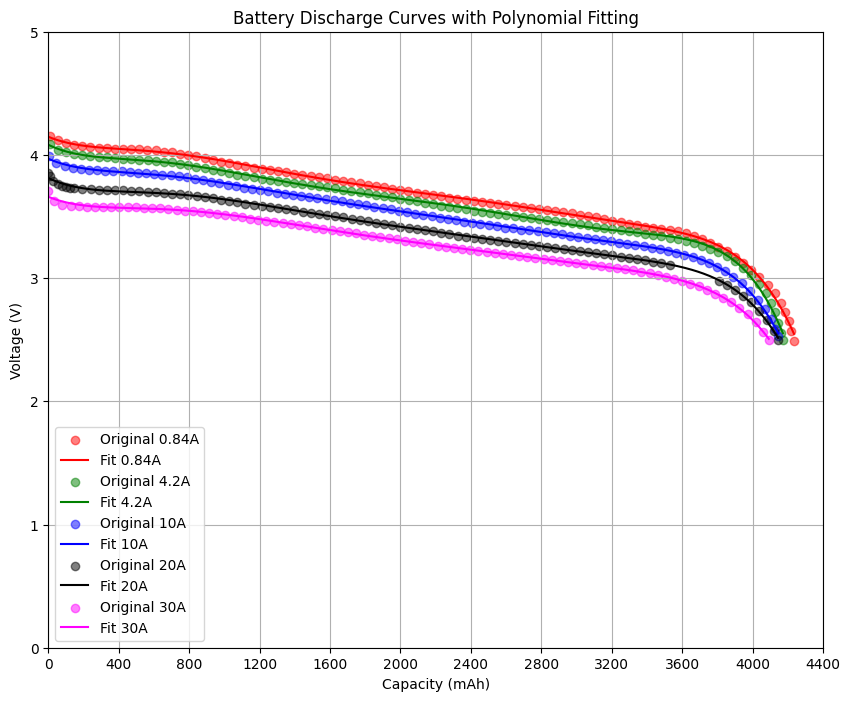

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to remove outliers using a rolling median
def remove_outliers(df, window_size, threshold_factor):
    rolling_median = df['Y'].rolling(window=window_size, center=True).median()
    deviation = abs(df['Y'] - rolling_median)
    threshold = threshold_factor * deviation.median()
    outliers = deviation > threshold
    return df[~outliers]

# Polynomial fitting function
def fit_poly(df):
    # Fit a polynomial curve of degree 'n' to the data
    # Change the degree if needed
    n = 7
    coefficients = np.polyfit(df['X'], df['Y'], n)
    p = np.poly1d(coefficients)

    # Print the equation
    equation = 'y = '
    equation += ' + '.join([f'{coeff:.2e}*x^{i}' for i, coeff in enumerate(coefficients[::-1])])
    print(equation)

    # Return the fitting polynomial function
    return p

# Load the data
# Replace the string with the correct path if the CSV files are not in the same directory
A84 = pd.read_csv('0.84A.csv', header=None)
A10 = pd.read_csv('10A.csv', header=None)
A20 = pd.read_csv('20A.csv', header=None)
A30 = pd.read_csv('30A.csv', header=None)
A42 = pd.read_csv('4.2A.csv', header=None)

# Add headers
A84.columns = ['X', 'Y']
A10.columns = ['X', 'Y']
A20.columns = ['X', 'Y']
A30.columns = ['X', 'Y']
A42.columns = ['X', 'Y']

# Parameters for outlier removal
window_size = 30  # Adjust if necessary
threshold_factor = 3  # Adjust if necessary

# Remove outliers from each dataframe
A84 = remove_outliers(A84, window_size, threshold_factor)
A10 = remove_outliers(A10, window_size, threshold_factor)
A20 = remove_outliers(A20, window_size, threshold_factor)
A30 = remove_outliers(A30, window_size, threshold_factor)
A42 = remove_outliers(A42, window_size, threshold_factor)


plt.figure(figsize=(10, 8))
datasets = [A84, A42, A10, A20, A30]
colors = ['red', 'green', 'blue', 'black', 'magenta']
labels = ['0.84A', '4.2A', '10A', '20A', '30A']

for df, color, label in zip(datasets, colors, labels):
    # Fit polynomial (Assuming fit_poly is previously defined and working correctly)
    p = fit_poly(df)

    # Plotting original points
    plt.scatter(df['X'], df['Y'], label=f'Original {label}', color=color, alpha=0.5)

    # Plotting the fit
    X_fit = np.linspace(df['X'].min(), df['X'].max(), 500)
    Y_fit = p(X_fit)
    plt.plot(X_fit, Y_fit, label=f'Fit {label}', color=color)

# Set specific parameters for the y-axis and x-axis
plt.ylim(0.0, 5.0)  # Set the limits for the y-axis
plt.yticks(np.arange(0.0, 5.1, 1.0))  # Set the ticks on the y-axis

plt.xlim(0, 4400)  # Set the limits for the x-axis
plt.xticks(np.arange(0, 4401, 400))  # Set the ticks on the x-axis

plt.title('Battery Discharge Curves with Polynomial Fitting')
plt.xlabel('Capacity (mAh)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

